# Introduction

###"What I cannot create, I do not understand." - Richard Feynman

In this project I will attempt to reproduce the analysis of the classic olive oils data-set from _"Interactive and Dynamic Graphics for Data Analysis: With Examples Using R and GGobi"_ using Python and matplotlib/seaborn. 

"_The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The goal of the analysis is to develop rules that reliably distinguish oils from the nine different areas. It is a problem of practical interest, because oil from some areas is more highly valued and unscrupulous suppliers sometimes make false claims about the origin of their oil. The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others._

_In addition, this is a good dataset for students of supervised classificationbecause it contains a mix of straightforward separations, difficult separations, and unexpected finds._

_In addition, fatty acid contents vary with climate: this information is important in deciding which varieties to grow where._"

_Description: This data consists of the percentage composition of fatty acids found in the lipid fraction of Italian olive oils. The data arises from a study to determine the authenticity of an olive oil."_


-**How do we distinguish the oils from different regions and areas in Italy based on their combinations of the fatty acids?**

-**Where should different varieties of olives be grown based on climate**?


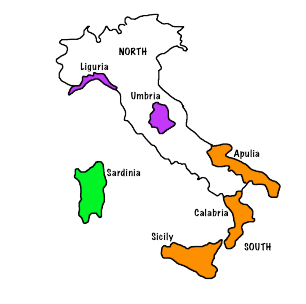

In [1]:
from IPython.display import Image
Image(filename='images/Italy.png')

# Libraries

In [2]:
%matplotlib inline
import brewer2mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
import seaborn as sns

from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Loading the Data

In [3]:
df = pd.read_csv("data/olive.csv")
df.head()

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


# Explore

In [4]:
df.shape

(572, 11)

- _Number of rows: 572_

- _Number of variables: 10_

Checking the unique regions and areas.

In [5]:
print 'regions\t', df.region.unique()
print 'areas\t', sorted(df.area.unique())

regions	[1 2 3]
areas	[1, 2, 3, 4, 5, 6, 7, 8, 9]


This verifies the information given in the description. Next, I need to make sure that each area belongs to only one region.

In [6]:
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [7]:
#region_groupby = df.groupby("region")
#dfrd = region_groupby.describe()
#dfrd.head(16)

# Cleaning the Data

The first column in the dataframe "Unnamed: 0" is cumbersome to deal with so I'll rename it. Its values also contain unneccessary numbers so I will strip that out also.

In [8]:
# Rename the first column.
df.rename(columns = {df.columns[0]:'areastring'}, inplace=True)

In [9]:
# Remove the numbering.
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


The values of the concentration of fatty acids should be in percentages, so that's the next change.

In [10]:
# Get a list of just the fatty acid features.
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 
          'linolenic', 'arachidic', 'eicosenoic']

# Make a new df for just the acids.
df1 = df[acidlist]

# Convert the acid columns to percentages.
df1 = df1.apply(lambda x: x/100.0)

# Replace the original df's acids with the new df's one.
df[acidlist] = df1

In [11]:
df.head(3)

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29


# Exploratory Data Analysis

While the original analysis used GGobi, I'm going to use matplotlib and seaborn for plotting.

## Custom Plot Config

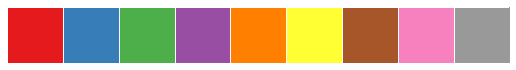

In [12]:
# Colorbrewer2 Dark2 qualitative color table.
cmap = brewer2mpl.get_map('Set1', 'Qualitative', 9)
palette = cmap.mpl_colors

sns.palplot(palette)

In [13]:
# Parameters for making plots clearer.
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True

## Correlation of Variables

I'm going to plot the acids against each other to see if there are patterns. I'll also print out a dataframe containing the actual correlation values.

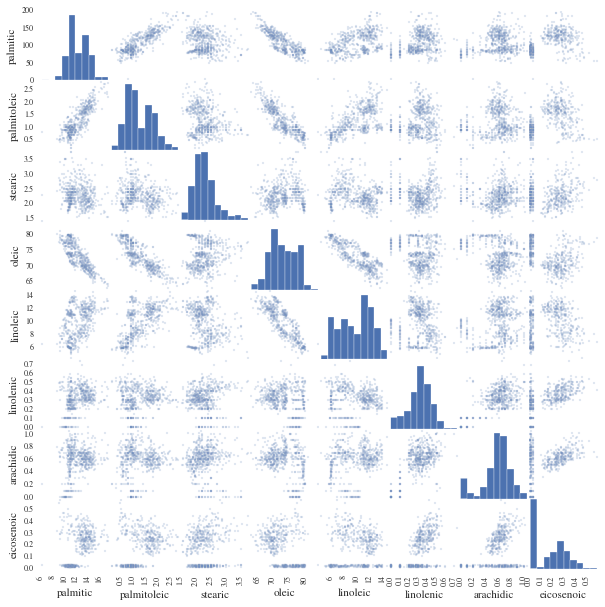

In [86]:
# Scatter matrix of just the acids.
ax = pd.tools.plotting.scatter_matrix(df1, alpha=0.2, figsize=(10, 10))    

In [15]:
df[acidlist].corr()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,1.000000,0.835605,-0.170392,-0.837335,0.460684,0.319327,0.228299,0.501952
palmitoleic,0.835605,1.000000,-0.222185,-0.852438,0.621627,0.093112,0.085481,0.416350
stearic,-0.170392,-0.222185,1.000000,0.113599,-0.197817,0.018917,-0.040979,0.140377
oleic,-0.837335,-0.852438,0.113599,1.000000,-0.850318,-0.218171,-0.319962,-0.424146
linoleic,0.460684,0.621627,-0.197817,-0.850318,1.000000,-0.057439,0.210973,0.089045
linolenic,0.319327,0.093112,0.018917,-0.218171,-0.057439,1.000000,0.620236,0.578319
arachidic,0.228299,0.085481,-0.040979,-0.319962,0.210973,0.620236,1.000000,0.328663
eicosenoic,0.501952,0.416350,0.140377,-0.424146,0.089045,0.578319,0.328663,1.000000


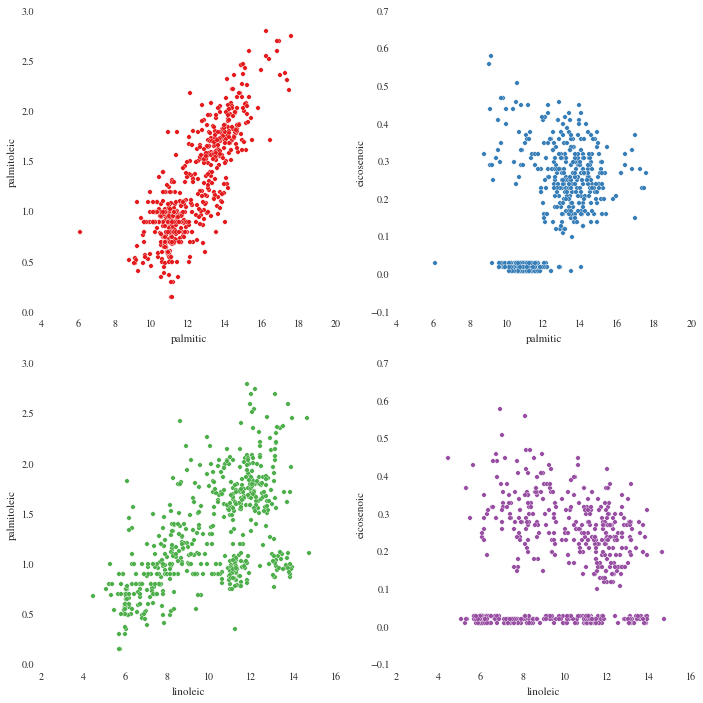

In [16]:
# List which acids to plot.
xacids=['palmitic','linoleic']
yacids=['palmitoleic','eicosenoic']

# Set up plot.
fig, ax = plt.subplots(figsize=(10,10), nrows=len(xacids), ncols=len(yacids))

# Counter.
k=0

# Plot a graph for each x, y combination.
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        ax[i][j].scatter(df[xacid],df[yacid], c=palette[k])
        ax[i][j].set_xlabel(xacid)
        ax[i][j].set_ylabel(yacid)
        k = k+1
        
fig.tight_layout()

There's a broad range of correlation here. For example palmitic-palmitoleic has a strong positive correlation (clustered, left-to-right slope) of 0.835, whereas linoleic-eicosenoic is randomly dispersed (no cluster, no evidence of a straight line).

## Investigating Regions

In order to investigate the relative amounts of each acid per region I will first have to aggregate the data.

In [17]:
# Create a new df that groups by region.
region_groupby = df.groupby('region')

# Make a new aggregated df for acids.
df_region = region_groupby[acidlist]

# Aggregate by the average.
df_agg_mean = df_region.aggregate(np.mean)

# Append a "_mean" to the end of each column header.
renamedict_mean={k:k+"_mean" for k in acidlist}
df_agg_mean.rename(inplace=True, columns=renamedict_mean) 

df_agg_mean.head()

,palmitic_mean,palmitoleic_mean,stearic_mean,oleic_mean,linoleic_mean,linolenic_mean,arachidic_mean,eicosenoic_mean
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


### Color Scheme

Next I have to map each region's number to its actual name so I can understand it better. For this I need to check what the name of areas associated with the region and check where the areas are on the map.

In [18]:
# Find out which Area each region is.
df.groupby("region").head(2)

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
421,Umbria,3,9,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01


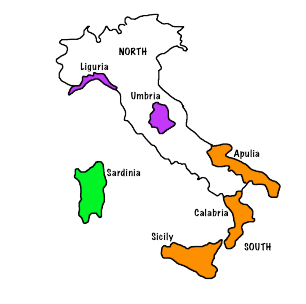

In [19]:
Image(filename='images/Italy.png')

In [139]:
# Create a map of region number: region name.
region_keys = [1,2,3]
region_names = ['South','Sardinia','North']
region_colors = ['Orange', 'Green', 'Purple']
region_rgb = [(1.0, 0.4980, 0.0), (0.302, 0.686, 0.290), (0.596, 0.306, 0.639)]

region_map = {e[0]: [e[1], e[2], e[3]] for e in zip(region_keys, region_names, region_colors, region_rgb)}
region_map

{1: ['South', 'Orange', (1.0, 0.498, 0.0)],
 2: ['Sardinia', 'Green', (0.302, 0.686, 0.29)],
 3: ['North', 'Purple', (0.596, 0.306, 0.639)]}

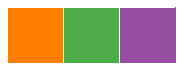

In [140]:
sns.palplot(region_rgb)

### Horizontal Bar Charts

Plot the different configurations of relative acid amounts in each region.

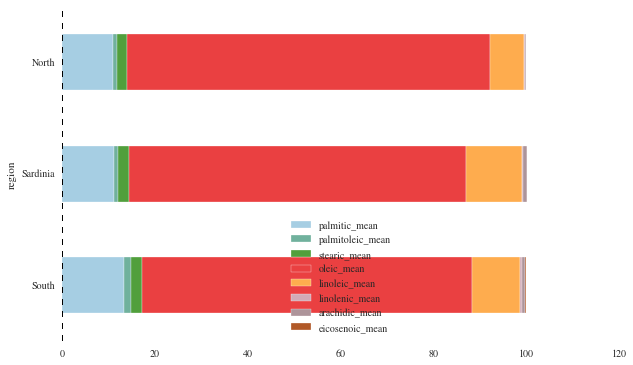

In [50]:
ax = df_agg_mean.plot(kind="barh", stacked=True, colormap="Paired")
ax.set_yticklabels(rvals);

In [22]:
df_agg_mean

,palmitic_mean,palmitoleic_mean,stearic_mean,oleic_mean,linoleic_mean,linolenic_mean,arachidic_mean,eicosenoic_mean
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Oleic dominates each region, and makes it diffcult to see the proportion of the other acids. Therefore I will temporarily remove it.

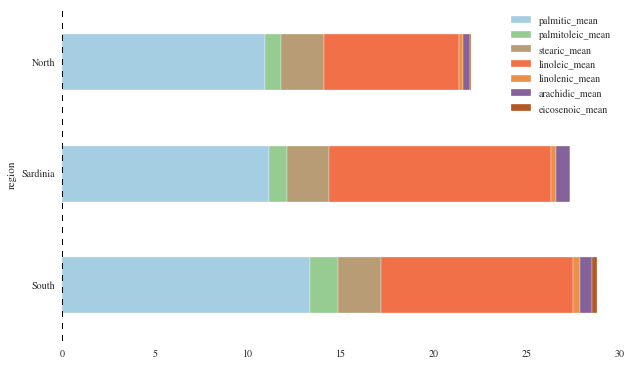

In [23]:
ax = df_agg_mean.drop("oleic_mean", axis=1).plot(kind="barh", stacked=True, colormap="Paired")
ax.set_yticklabels(rvals);

In [24]:
df_agg_mean.drop("oleic_mean", axis=1)

,palmitic_mean,palmitoleic_mean,stearic_mean,linoleic_mean,linolenic_mean,arachidic_mean,eicosenoic_mean
region,,,,,,,
1,13.322879,1.548019,2.287740,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,7.270331,0.217881,0.375762,0.019735


Note that there are is a very low percentage of eicosenoic acids in Sardinia and the North. This is something that is very useful for building a classifier so I'll investigate it further.

### Univariate Plots

We first paint the points according to region. Using univariate
plots, we look at each explanatory variable in turn, looking for separations
between pairs of regions. 

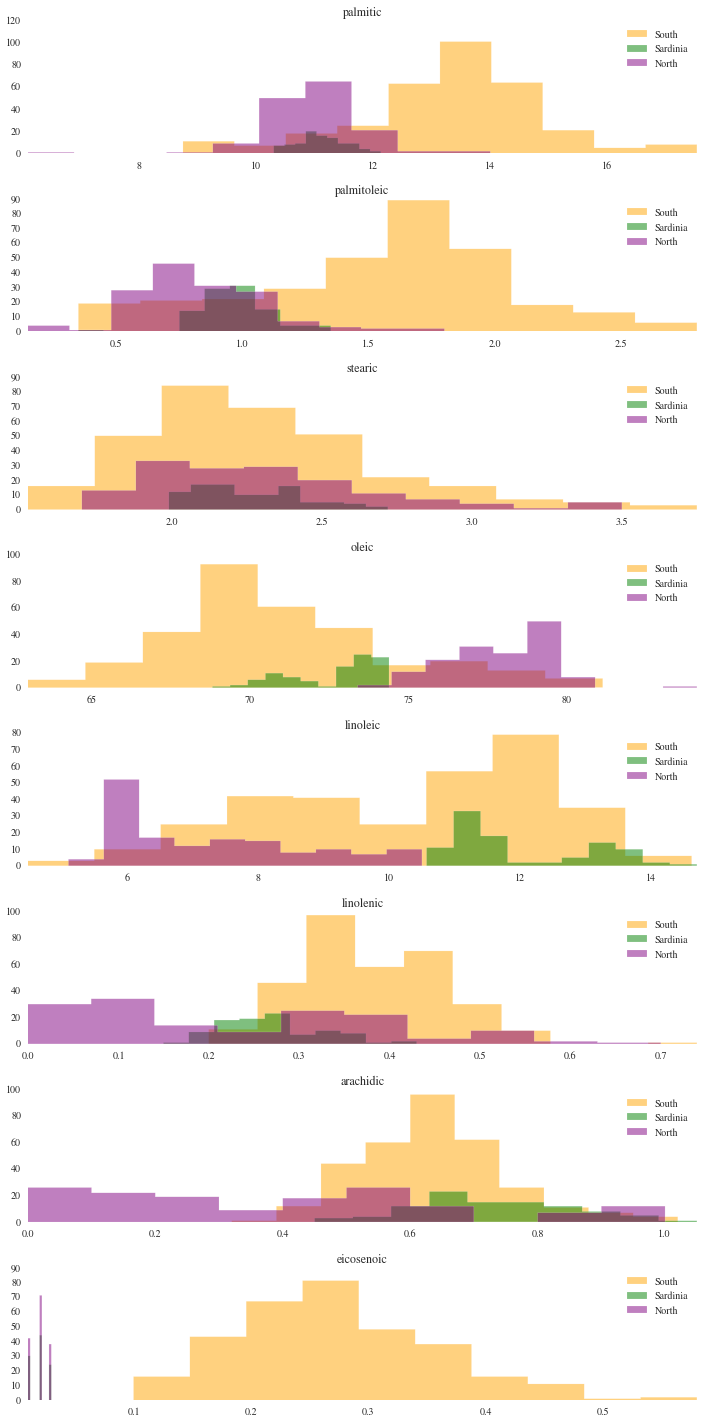

In [173]:
# Setup plot area.
fig, axes=plt.subplots(figsize=(10,20), nrows=len(acidlist), ncols=1)

i=0

for ax in axes.flatten():
    # Get the name of the acid.
    acid = acidlist[i]
    
    # Get the pandas series.
    seriesacid = df[acid]
    
    # Get the min and max values.
    minmax = [seriesacid.min(), seriesacid.max()]
    
    color=palette1[k-1]
    
    # For region number and its df.
    for k, g in df.groupby('region'):
        style = {'histtype':'stepfilled', 'alpha':0.5, 'label':region_map[k], 'color':palette1[k-1], 'ax':ax}
        g[acid].hist(**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.grid(False)
    
    # Construct legend
    ax.legend()
    
    i+=1
    
fig.tight_layout()

The last plot shows that oils from the North and Sardinia regions contain no eicosenoic acid. This means we can cleanly separate the oils of the South (Orange) from those of the other regions using just one variable, eicosenoic.

In order to differentiate the oils from the North and Sardinia, we remove
the Southern oils from view and continue plotting one variable at a time. 

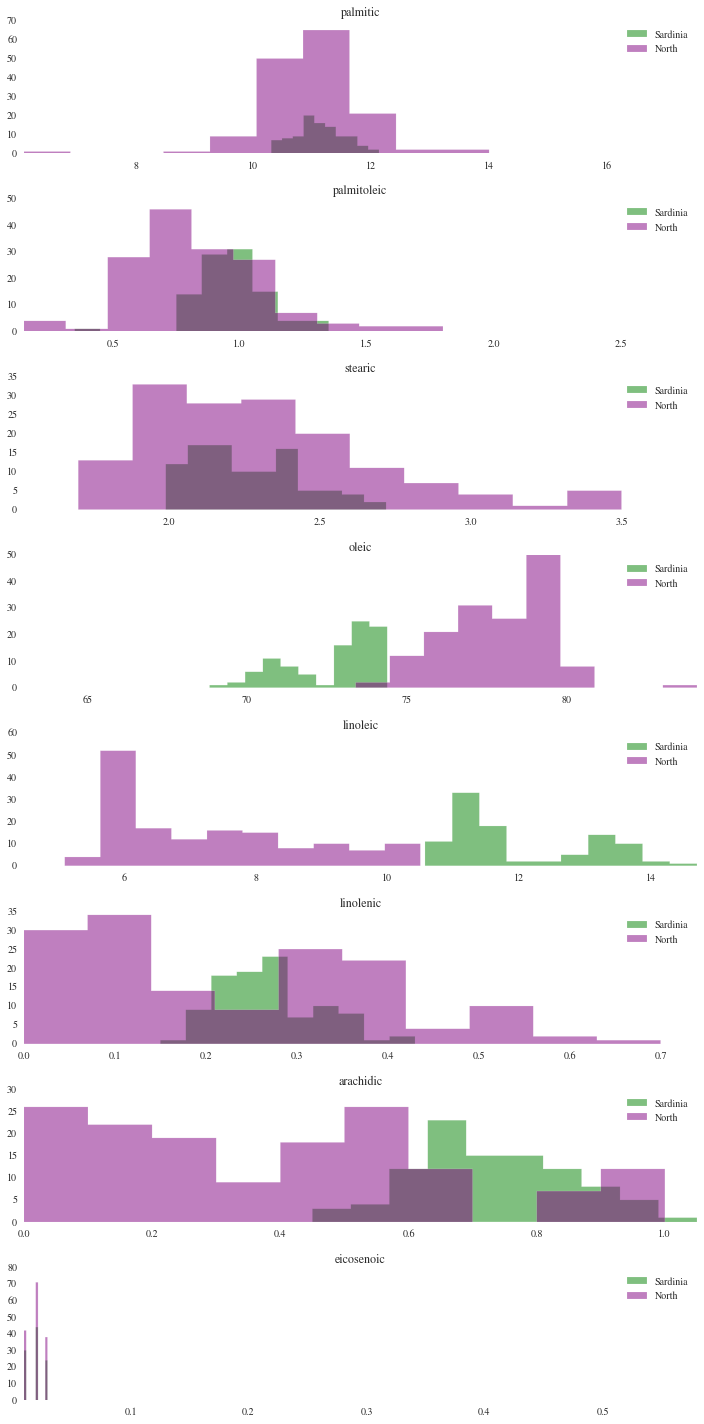

In [184]:
# Setup plot area.
fig, axes=plt.subplots(figsize=(10,20), nrows=len(acidlist), ncols=1)

i=0

for ax in axes.flatten():
    # Get the name of the acid.
    acid = acidlist[i]
    
    # Get the pandas series.
    seriesacid = df[acid]
    
    # Get the min and max values.
    minmax = [seriesacid.min(), seriesacid.max()]
    
    color=palette1[k-1]
    
    # For region number and its df.
    for k, g in df.groupby('region'):
        if k in [2, 3]:
            style = {'histtype':'stepfilled', 'alpha':0.5, 'label':region_map[k], 'color':palette1[k-1], 'ax':ax}
            g[acid].hist(**style)
            ax.set_xlim(minmax)
            ax.set_title(acid)
            ax.grid(False)
    
    # Construct legend
    ax.legend()
    
    i+=1
    
fig.tight_layout()

Several variables show differences between the oils of
the two regions, and we have plotted two of them: oleic and linoleic. Oils from
Sardinia contain lower amounts of oleic acid and higher amounts of linoleic
acid than oils from the north. The two regions are perfectly separated by
linoleic, but since there is no gap between the two groups of points, we will
keep looking.

### Bivariate Plots

If one variable is not enough to distinguish Northern oils from
Sardinian oils, perhaps we can find a pair of variables that will do the job.
Starting with oleic and linoleic, which were so promising when taken singly,
we look at pairwise scatterplots. 

In [202]:
def marginalPlot(df, scatterx, scattery, by="region", labeler={}):
    
    """
    Creates a marginal plot, given a dataframe, names of 2 columns, a factor, 
    and a set of labels for the regions.
    """
    
    # Sizing for the axes.
    left, width = 0.1, 0.6
    bottom, height = 0.00, 0.6
    bottom_h = left_h = left + width + 0.02

    # Positions for the axes.
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # Instantiating the axes.
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # Divide up range(0, 1) by the number of regions. 
    # (for colors).
    cs = list(np.linspace(0, 1, len(df.groupby(by))))

    # Dicts for each region and its x, y values.
    xs = {}
    ys = {}

    # For region number and its part of the df.
    for k, g in df.groupby(by):

        # Select the columns to plot.
        x = g[scatterx]
        y = g[scattery]

        # Store as {region1: [x1, x2...xn], region2...}.
        xs[k] = x
        ys[k] = y

        # Plot the region's data - scatter, xhist, yhist.
        color=palette1[k-1]
        axScatter.scatter(x, y, c=color, label=labeler.get(k)[0], s=40, alpha=0.4);
        axHistx.hist(list(x), color=color, alpha=0.4)
        axHisty.hist(list(y), orientation='horizontal', color=color, alpha=0.4)
           
    # Set the scatterplot axes titles.
    axScatter.set_xlabel(scatterx.title())
    axScatter.set_ylabel(scattery.title())

    # Deleting the histogram axes titles.
    axHistx.get_xaxis().set_ticks([])
    axHistx.get_yaxis().set_ticks([])
    axHisty.get_xaxis().set_ticks([])
    axHisty.get_yaxis().set_ticks([])
    
    # Turn off the grid.
    axScatter.grid(False)

    # Add a legend.
    axScatter.legend()
    
    # Add a title
    plt.suptitle("Different Acidic Concentrations in Olives Regionally", fontsize=20)

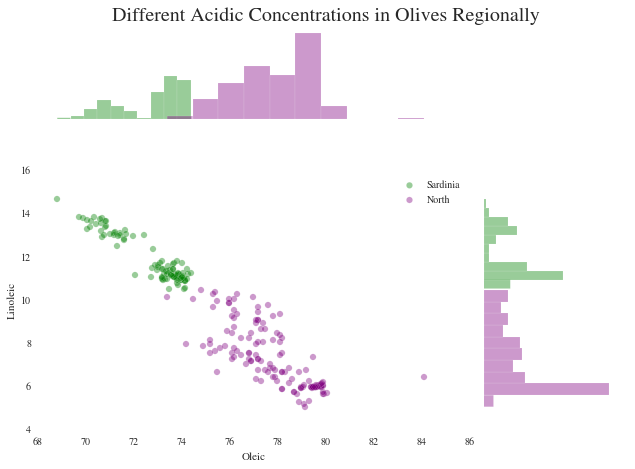

In [219]:
marginalPlot(df[df.region != 1], "oleic", "linoleic", labeler=region_map)

Unfortunately, the
combination of oleic and linoleic is no more powerful than each one was alone.
They are strongly negatively associated, and there is still not a large gap between the
two groups.
We explore other pairs of variables. 

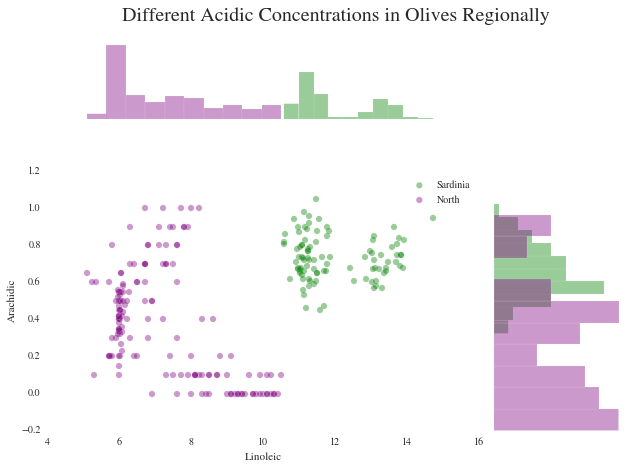

In [222]:
marginalPlot(df[df.region != 1], "linoleic", "arachidic", labeler=region_map)

Something interesting emerges from a
plot of arachidic and linoleic: There is big gap between the points of the two
regions! Arachidic alone seems to have no power to separate, but it improves
the power of linoleic. Since the gap between the two groups follows a non-linear,
almost quadratic path, we must do a bit more work to define a functional
boundary.


Here we see that Northern (red circles) and Sardinian (orange rectangles) oils are separated by both oleic (top histogram) and linoleic (right histogram), although there is no gap between the two clusters.

# Building Classifiers to Predict Region

In [89]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Also, if you want to avoid palmitic acid, which has “convincing” evidence linking it to heart disease, stay away from olive oil from Southern Italy, apparently.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

http://concept-formation.readthedocs.org/en/latest/examples/cobweb3_cluster_simulated.html